#                                        Student Depression Dataset

## About Dataset

A student depression dataset typically contains data aimed at analyzing, understanding, and predicting depression levels among students. It may include features such as demographic information (age, gender), academic performance (grades, attendance), lifestyle habits (sleep patterns, exercise, social activities), mental health history, and responses to standardized depression scales.

These datasets are valuable for research in psychology, data science, and education to identify factors contributing to student depression and to design early intervention strategies. Ethical considerations like privacy, informed consent, and anonymization of data are crucial in working with such sensitive information.

### Columns Details

##### 1)  ID: Unique identifier for each student.
##### 2)  Age: Age of the student.
##### 3)  Gender: Gender (eg: Male, Female).
##### 4)  City: Geographic region
##### 5)  CGPA: Grade Point Average or other academic scores.
##### 6)  Sleep Duration: Average daily sleep duration.
##### 7)  Profession: Profession of the student.
##### 8)  Work Pressure: Level of work pressure experienced.
##### 9)  Academic Pressure:  Level of academic pressure experienced.
##### 10)  Study Satisfaction: Satisfaction level with studies.
##### 11)  Job Satisfaction: Satisfaction level with job (if applicable).
##### 12)  Dietary Habits:Dietary habits of the student.
##### 13)  Degree : Degree qualification of student                                
##### 14)  Have you ever had suicidal thoughts ? : Indicates whether the student has ever had suicidal thoughts (binary: 0 = No, 1 = Yes).
##### 15)  Work/Study Hours : Number of hours spent on work or study per day.
##### 16)  Financial Stress : Level of financial stress experienced by the student (0-5).                      
##### 17)  Family History of Mental Illness :  Indicates whether the student has a family history of mental illness (binary: 0 = No, 1 = Yes).###
##### 18)  Depression : Binary target variable indicating depression status (Yes/No). 

### Target Variable

##### Depression_Status: Binary (Yes/No)

## Importing Libraries

In [2318]:
import pandas as pd # For data manipulation and analysis
import numpy as np # linear algebra
import matplotlib.pyplot as plt  # For general-purpose plotting
import seaborn as sns # For creating statistical data visualizations

import warnings   # For suppressing unnecessary warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder # For normalizing encoding
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler # For feature scaling and standardization
from sklearn.ensemble import RandomForestClassifier # For building Random Forest Classifier models
from sklearn.linear_model import LogisticRegression # For building logistic regression models
from sklearn.metrics import accuracy_score # For calculating acu=curacy score
from sklearn.neighbors import KNeighborsClassifier # For building K-Neighbors Classifier models
from sklearn.tree import DecisionTreeClassifier # For building Decision Tree Classifier models
from sklearn.metrics import confusion_matrix, roc_curve, auc  # For model evaluation confusion matrix
from sklearn.metrics import classification_report # for building classification report of each model

In [2319]:
#Checking Dataset
df=pd.read_csv('Student Depression Dataset.csv')
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [2320]:
#informations about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [2321]:
#columns in dataset
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [2322]:
#shape of dataset ------->(row,columns)
df.shape

(27901, 18)

In [2323]:
#checking null values in each columns
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [2324]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [2325]:
#cheking number of unique values in each columns
df.nunique()

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
dtype: int64

## Data Cleaning & Preprocessing

In [2327]:
#dropping unwandered coloumns
df.drop(['id', 'City'], axis = 1, inplace = True)
df.shape

(27901, 16)

In [2328]:
#Handling missing values
df.loc[:, 'Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].mean())

In [2329]:
df.isna().sum()

Gender                                   0
Age                                      0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [2330]:
#duplicates
df.duplicated().sum()

0

In [2331]:
# CGPA
df['CGPA'] = df['CGPA'].round(2)
df['CGPA'].value_counts().head(10)


CGPA
8.04    821
9.96    425
5.74    410
8.95    371
9.21    343
7.25    339
7.09    320
7.88    318
9.44    317
8.91    276
Name: count, dtype: int64

In [2332]:
## cgpa.

df = df[df['CGPA'] != 0]
df.shape

(27892, 16)

In [2333]:
#for checking the datatype of each columns
df.dtypes

Gender                                    object
Age                                      float64
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [2334]:
#encoding
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Profession'] = le.fit_transform(df['Profession'])
df['Sleep Duration'] = le.fit_transform(df['Sleep Duration'])
df['Dietary Habits'] = le.fit_transform(df['Dietary Habits'])
df['Degree']=le.fit_transform(df['Degree'])
df['Have you ever had suicidal thoughts ?']=le.fit_transform(df['Have you ever had suicidal thoughts ?'])
df['Family History of Mental Illness']=le.fit_transform(df['Family History of Mental Illness'])
df.sample(5)

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
19411,1,26.0,11,3.0,0.0,9.44,4.0,0.0,2,0,11,1,12.0,2.0,1,1
15452,0,29.0,11,2.0,0.0,5.60,3.0,0.0,3,0,23,1,8.0,5.0,0,1
23229,1,30.0,11,2.0,0.0,5.84,4.0,0.0,1,1,25,1,10.0,5.0,1,1
58,1,23.0,11,5.0,0.0,5.74,1.0,0.0,0,0,5,1,11.0,4.0,1,1
2482,0,25.0,11,3.0,0.0,9.93,1.0,0.0,2,1,2,0,12.0,4.0,0,1


In [2335]:
df.corr()

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
Gender,1.000000,0.009050,0.008267,-0.022025,NaN,0.036576,-0.015859,0.007403,0.012212,0.063382,0.010526,-0.001245,0.013012,-0.005418,-0.015742,0.001913
Age,0.009050,1.000000,-0.004012,-0.076108,NaN,0.005103,0.008987,0.002671,-0.010074,-0.061695,0.090518,-0.113370,-0.032889,-0.094975,-0.004823,-0.226305
Profession,0.008267,-0.004012,1.000000,-0.011631,NaN,-0.004647,-0.008927,0.000212,-0.004702,0.010316,-0.007383,-0.004844,0.004688,-0.009271,-0.010814,-0.016438
Academic Pressure,-0.022025,-0.076108,-0.011631,1.000000,NaN,-0.024968,-0.111997,0.001552,-0.006374,0.091204,-0.007788,0.261751,0.095875,0.151975,0.030046,0.475023
Work Pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CGPA,0.036576,0.005103,-0.004647,-0.024968,NaN,1.000000,-0.046695,0.010747,-0.020883,0.001416,-0.023975,0.008669,0.002798,0.006530,-0.004278,0.021829
Study Satisfaction,-0.015859,0.008987,-0.008927,-0.111997,NaN,-0.046695,1.000000,0.005222,0.003869,-0.016996,0.004179,-0.083469,-0.036637,-0.064798,-0.004127,-0.168027
Job Satisfaction,0.007403,0.002671,0.000212,0.001552,NaN,0.010747,0.005222,1.000000,-0.000870,0.002239,0.010883,-0.004010,-0.001695,0.001504,-0.008042,-0.003128
Sleep Duration,0.012212,-0.010074,-0.004702,-0.006374,NaN,-0.020883,0.003869,-0.000870,1.000000,0.010822,0.000120,-0.021239,-0.038697,-0.002197,0.000173,-0.022427
Dietary Habits,0.063382,-0.061695,0.010316,0.091204,NaN,0.001416,-0.016996,0.002239,0.010822,1.000000,-0.007691,0.112210,0.029778,0.090206,0.005800,0.206657


In [2336]:
convert_columns = ['Age','Academic Pressure','Work Pressure','Study Satisfaction','Job Satisfaction', 'Work/Study Hours','Financial Stress','CGPA']

for i in convert_columns:
    df[i] = df[i].astype('int64')

In [2337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27892 entries, 0 to 27900
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Gender                                 27892 non-null  int32
 1   Age                                    27892 non-null  int64
 2   Profession                             27892 non-null  int32
 3   Academic Pressure                      27892 non-null  int64
 4   Work Pressure                          27892 non-null  int64
 5   CGPA                                   27892 non-null  int64
 6   Study Satisfaction                     27892 non-null  int64
 7   Job Satisfaction                       27892 non-null  int64
 8   Sleep Duration                         27892 non-null  int32
 9   Dietary Habits                         27892 non-null  int32
 10  Degree                                 27892 non-null  int32
 11  Have you ever had suicidal though

## Analysis

In [2339]:
df['Depression'].value_counts()

Depression
1    16332
0    11560
Name: count, dtype: int64

In [2340]:
dep_count=df['Depression'].value_counts()


Text(0.5, 1.0, 'Depressed vs Not Depressed')

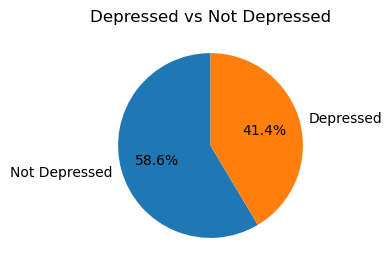

In [2341]:
plt.figure(figsize=(6, 3))
plt.pie(dep_count, labels=['Not Depressed', 'Depressed'],autopct='%1.1f%%',startangle=90,colors=sns.color_palette("tab10"))
plt.title('Depressed vs Not Depressed')

In [2342]:
counts = df['Have you ever had suicidal thoughts ?'].value_counts()

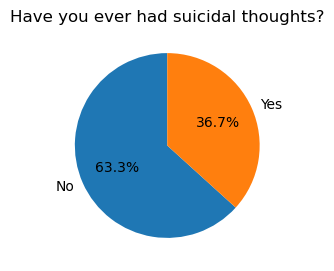

In [2343]:
plt.figure(figsize=(6, 3))
plt.pie(counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("tab10"))
plt.title('Have you ever had suicidal thoughts?')
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

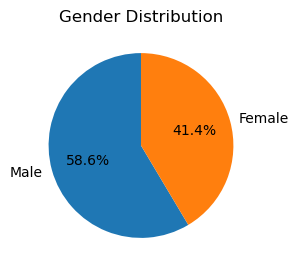

In [2344]:
plt.figure(figsize=(6, 3))
plt.pie(dep_count, labels=['Male', 'Female'],autopct='%1.1f%%',startangle=90,colors=sns.color_palette("tab10"))
plt.title('Gender Distribution')

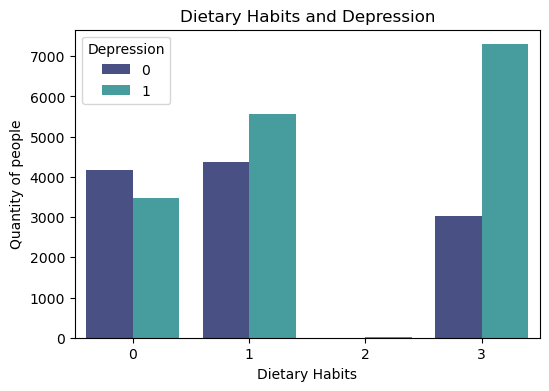

In [2345]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Dietary Habits', hue='Depression', data=df, palette='mako')
plt.title('Dietary Habits and Depression')
plt.xlabel('Dietary Habits')
plt.ylabel('Quantity of people')
plt.show()

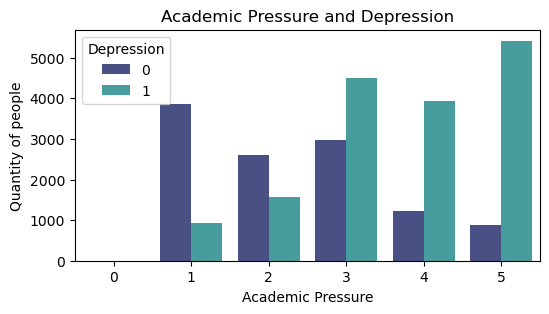

In [2346]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Academic Pressure', hue='Depression', data=df, palette='mako')
plt.title('Academic Pressure and Depression')
plt.xlabel('Academic Pressure')
plt.ylabel('Quantity of people')
plt.show()


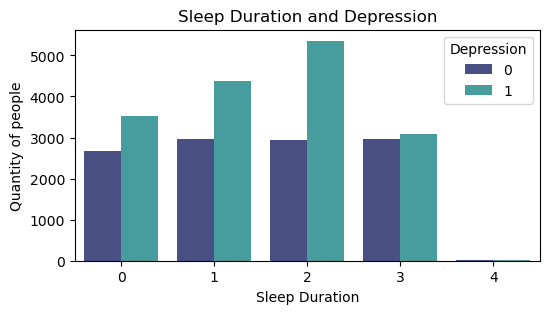

In [2347]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Sleep Duration', hue='Depression', data=df, palette='mako')
plt.title('Sleep Duration and Depression')
plt.xlabel('Sleep Duration')
plt.ylabel('Quantity of people')
plt.show()

plt.figure(figsize=(6, 3))
sns.barplot(x='Depression', y='Study Satisfaction', data=df, palette='mako')
plt.title('Study Satisfaction and Depression')
plt.show()

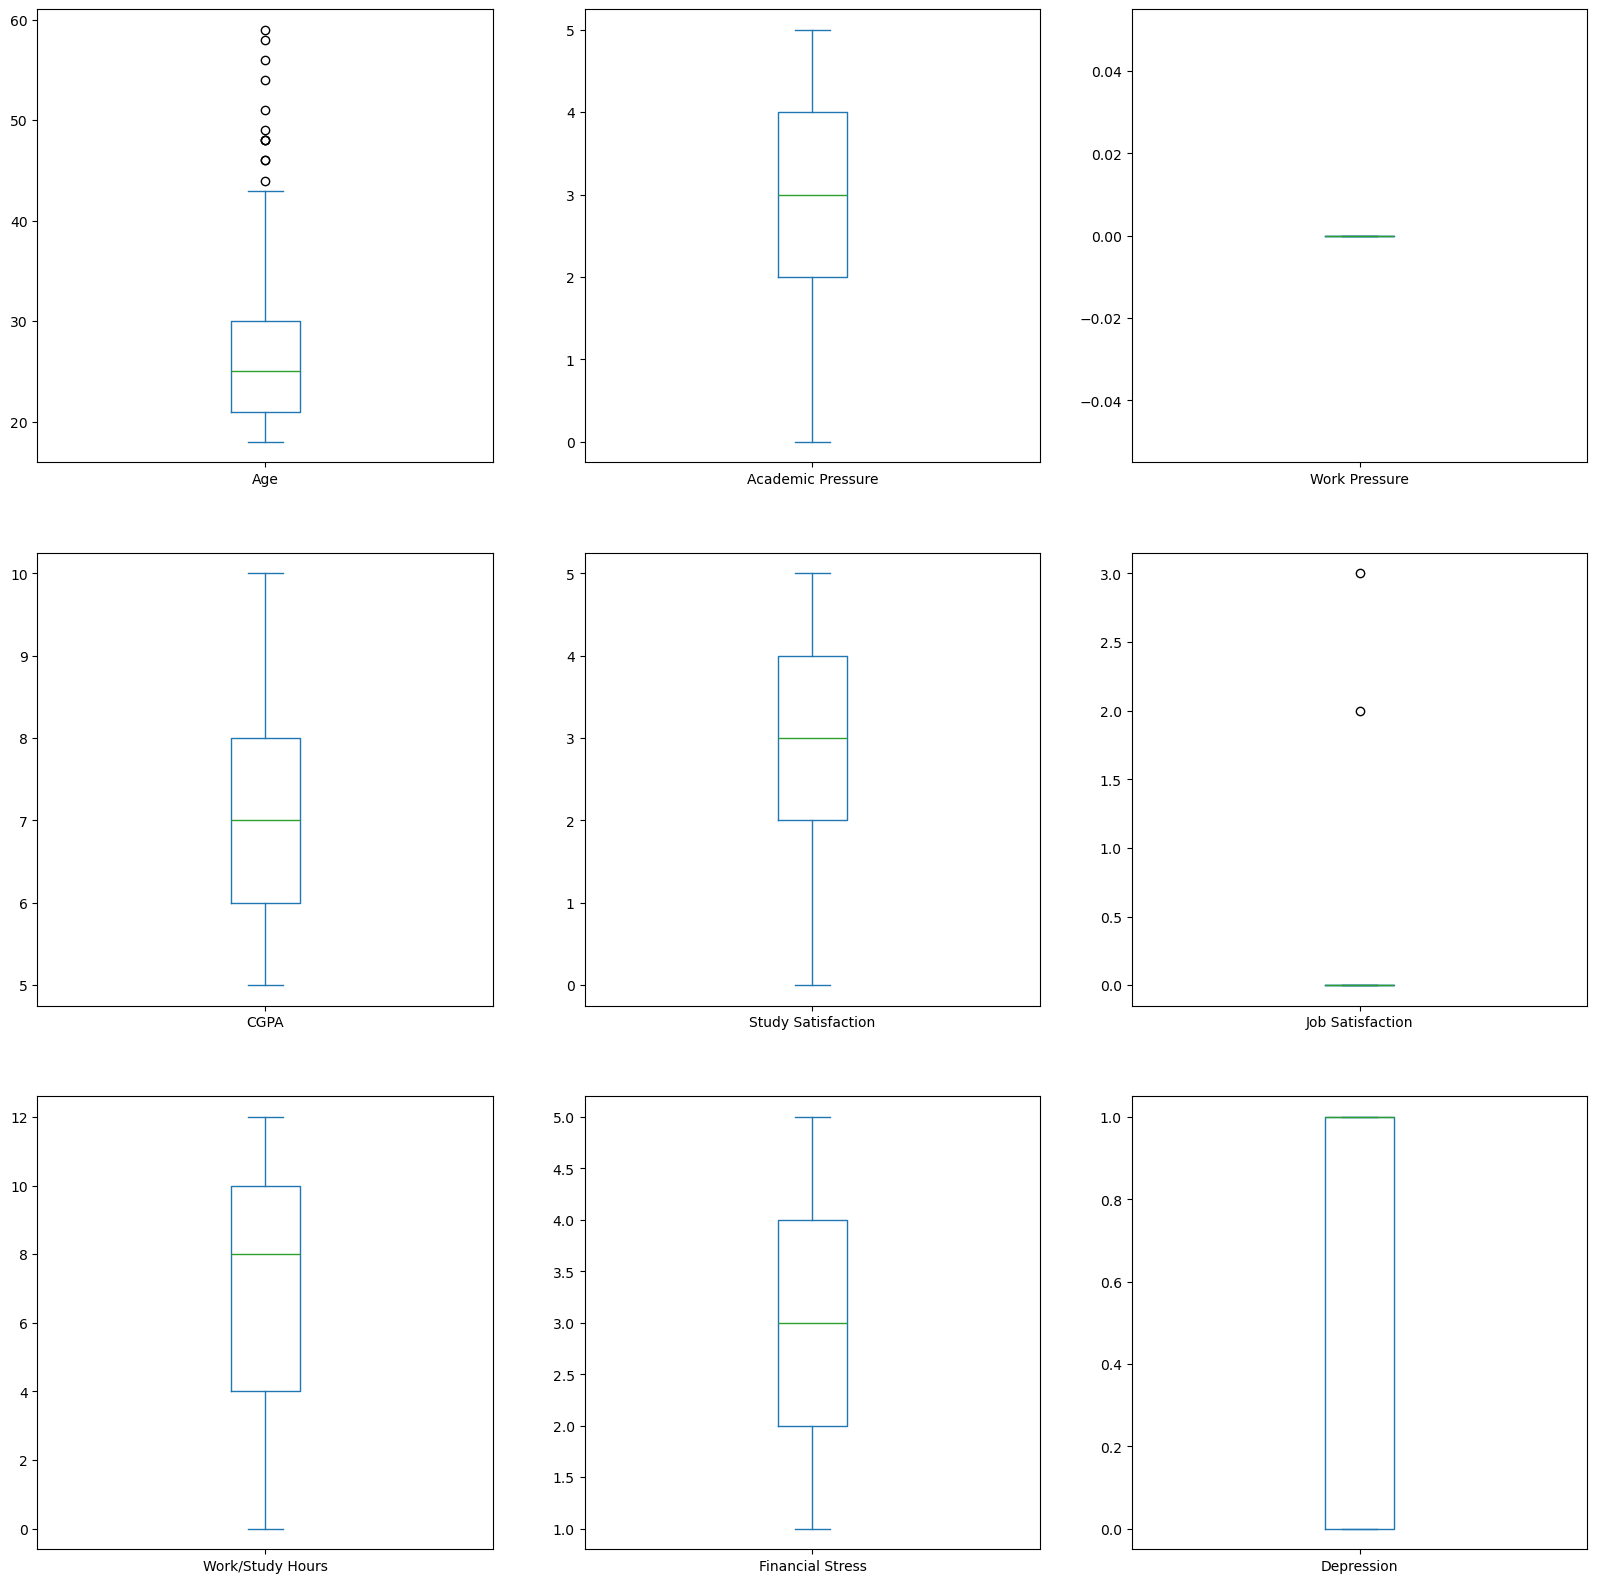

In [2349]:
# outlier of all int  coloumns
values=['Age','Academic Pressure','Work Pressure','CGPA','Study Satisfaction','Job Satisfaction','Work/Study Hours','Financial Stress','Depression']
df[values].plot(subplots=True,kind='box',layout=(3,3),figsize=(20,20))
plt.show()

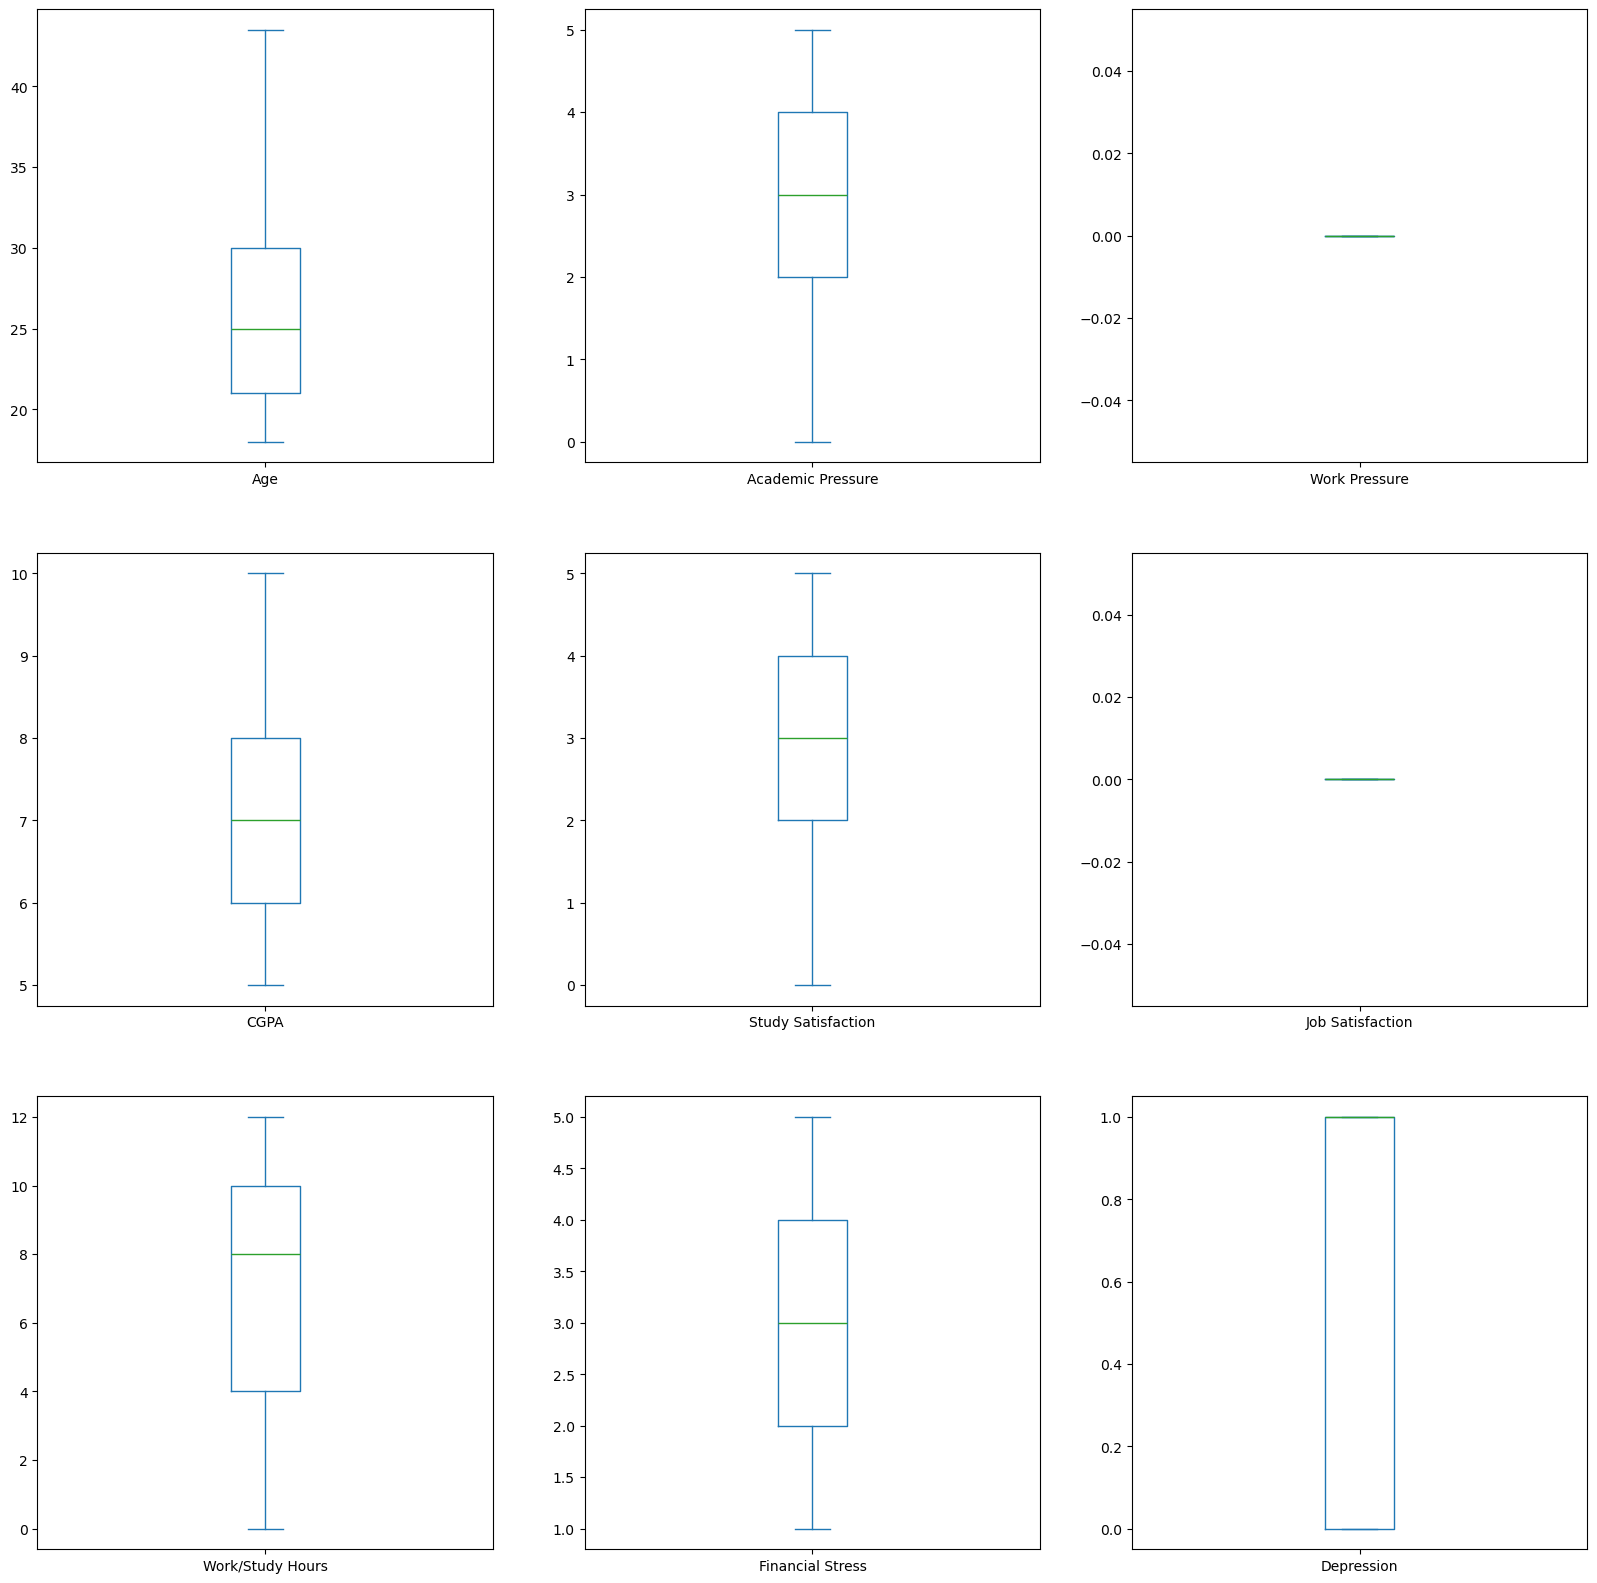

In [2350]:
# Removing outliers

for column in values:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = df[column].clip(lower_bound, upper_bound)

df[values].plot(subplots=True,kind='box',layout=(3,3),figsize=(20,20))
plt.show()

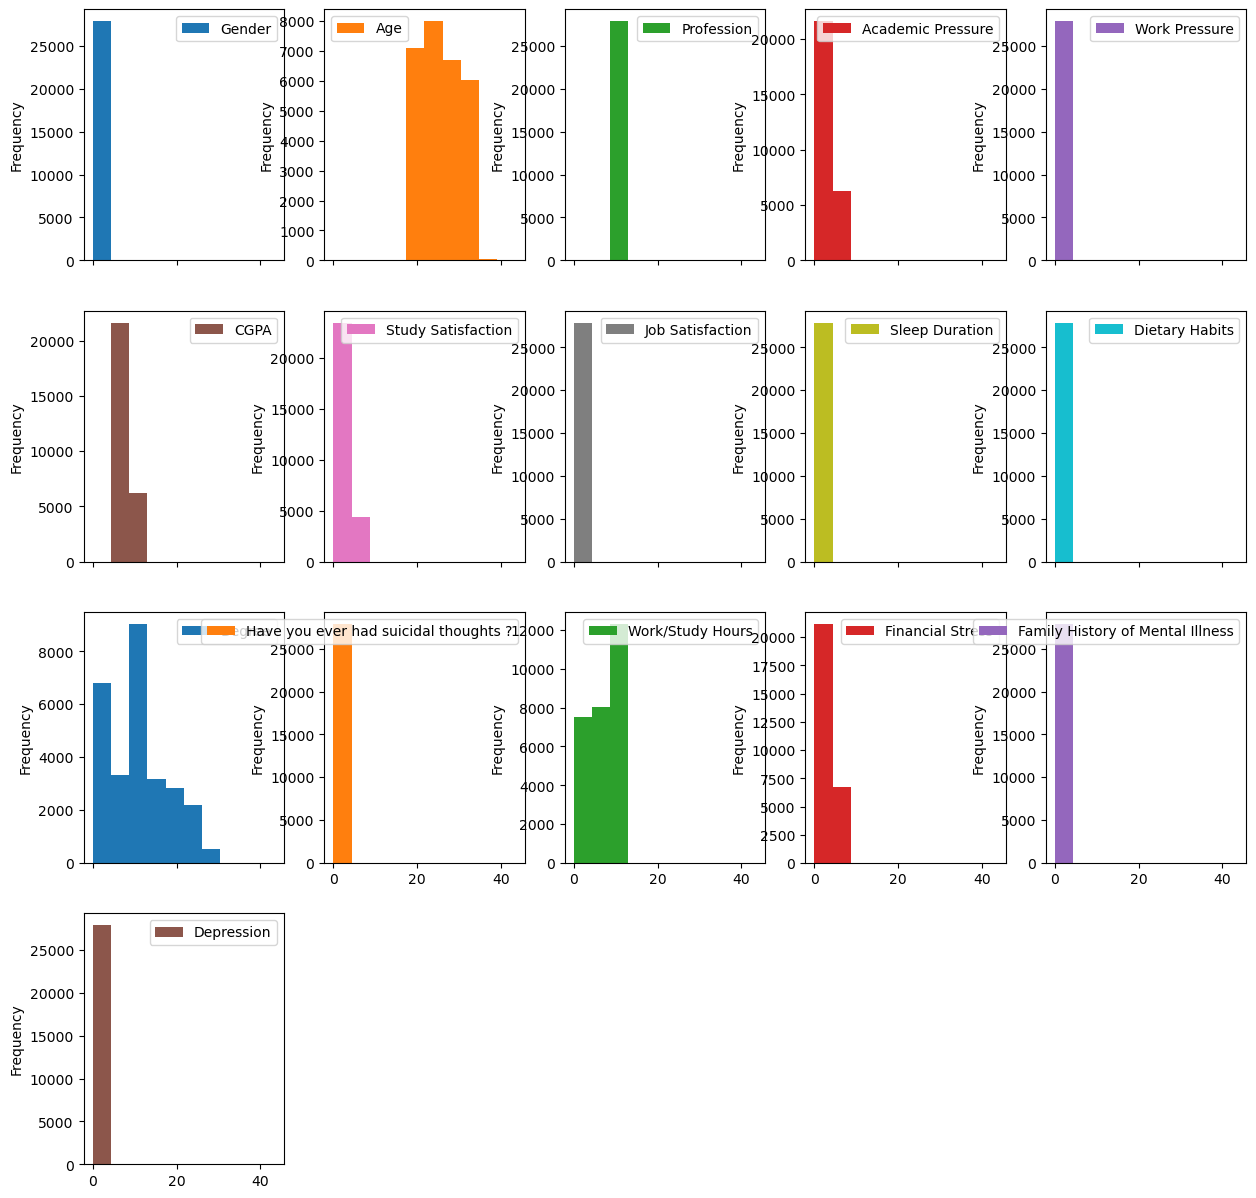

In [2351]:
df.plot(subplots=True, kind='hist',layout=(4,5),figsize=(15,15))
plt.show()

## Spliting X and Y

In [2353]:
X = df.drop(['Depression'], axis=1).values

In [2354]:
X

array([[ 1., 33., 11., ...,  3.,  1.,  0.],
       [ 0., 24., 11., ...,  3.,  2.,  1.],
       [ 1., 31., 11., ...,  9.,  1.,  1.],
       ...,
       [ 1., 31., 11., ..., 12.,  2.,  0.],
       [ 0., 18., 11., ..., 10.,  5.,  0.],
       [ 1., 27., 11., ...,  2.,  3.,  1.]])

In [2355]:
y=df.Depression.values

In [2356]:
y

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [2357]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Standardisation

In [2359]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

## Model Creation

## 1. Random Forest Classifier

In [2362]:
model_rf= RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [2363]:
y_pred = model_rf.predict(X_test)

In [2364]:
rf_score = accuracy_score(y_test, y_pred)*100
rf_score

83.86634160332711

### Confusion Matrix

In [2366]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix of Random Forest Classifier:\n", cm)


Confusion Matrix of Random Forest Classifier:
 [[2248  639]
 [ 486 3600]]


### Classification Report

In [2368]:
print("\nClassification Report of  Random Forest Classifier:\n", classification_report(y_test, y_pred))


Classification Report of  Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      2887
           1       0.85      0.88      0.86      4086

    accuracy                           0.84      6973
   macro avg       0.84      0.83      0.83      6973
weighted avg       0.84      0.84      0.84      6973



## 2. Logistic Regression

In [2370]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


LogisticRegression()

In [2371]:
y_pred_lr = lr_model.predict(X_test)
lr_score = accuracy_score(y_test, y_pred_lr)*100
lr_score

84.51168793919403

### Confusion Matrix

In [2373]:
cm = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix of Logistic Regression:\n", cm)


Confusion Matrix of Logistic Regression:
 [[2259  628]
 [ 452 3634]]


### Classification Report

In [2375]:
print("\nClassification Report of Logistic Regression:\n", classification_report(y_test, y_pred_lr))


Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81      2887
           1       0.85      0.89      0.87      4086

    accuracy                           0.85      6973
   macro avg       0.84      0.84      0.84      6973
weighted avg       0.84      0.85      0.84      6973



## 3. K-Neighbors Classifier

In [2377]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [2378]:
y_pred_knn = knn_model.predict(X_test)

In [2379]:
knn_score = accuracy_score(y_test, y_pred_knn)*100
knn_score

82.23146421913093

### Confusion Matrix

In [2381]:
cm = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix of K-Neighbors Classifier:\n", cm)


Confusion Matrix of K-Neighbors Classifier:
 [[2142  745]
 [ 494 3592]]


### Classification Report

In [2383]:
print("\nClassification Report of K-Neighbors Classifier:\n", classification_report(y_test, y_pred_knn))


Classification Report of K-Neighbors Classifier:
               precision    recall  f1-score   support

           0       0.81      0.74      0.78      2887
           1       0.83      0.88      0.85      4086

    accuracy                           0.82      6973
   macro avg       0.82      0.81      0.81      6973
weighted avg       0.82      0.82      0.82      6973



## 4. Decision Tree Classifier

In [2385]:
dtree = DecisionTreeClassifier()

In [2386]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [2387]:
predictions = dtree.predict(X_test)

In [2388]:
tree_score = accuracy_score(y_test, predictions)*100
tree_score

76.83923705722071

### Confusion Matrix

In [2390]:
cm = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix of Decision Tree Classifier:\n", cm)


Confusion Matrix of Decision Tree Classifier:
 [[2084  803]
 [ 812 3274]]


### Classification Report

In [2392]:
print("\nClassification Report of Decission Tree Classifier:\n", classification_report(y_test, predictions))


Classification Report of Decission Tree Classifier:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      2887
           1       0.80      0.80      0.80      4086

    accuracy                           0.77      6973
   macro avg       0.76      0.76      0.76      6973
weighted avg       0.77      0.77      0.77      6973



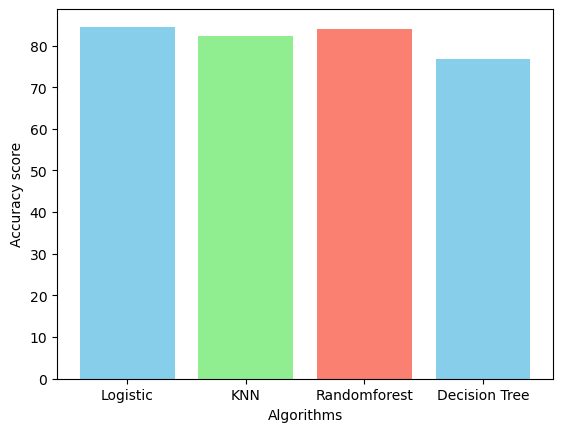

In [2393]:
colors = ['skyblue','lightgreen','salmon']
plt.bar(['Logistic','KNN','Randomforest','Decision Tree'], [lr_score,knn_score,rf_score,tree_score], color = colors)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy score')
plt.show()

## Conclusion

In conclusion, this machine learning project successfully applied data analysis and modeling techniques to solve student depression dataset. The model was trained, tested, and evaluated, showing good performance in predicting the desired outcomes.

Here we utilized different calculations to describe the student depression dataset. The Logistic Regression model achieved an accuracy score of 84.5%, while the Random Forest model performed slightly lower with an accuracy score of 83.8%. Although both models performed well, the Logistic Regression model slightly outperformed Random Forest in terms of accuracy. This suggests that Logistic Regression might be a better choice for this particular problem, but further testing and tuning could potentially improve both models.This project demonstrates how machine learning can be used effectively to gain insights and make predictions, with opportunities for future enhancements.

## Thank You